# Projeto 2-Ciência dos Dados


# Predição de AVC

Alunos:

Jonas Bonfá

Renato Falcão

Gabriel de Araújo 

Ricardo Mourão

# Introdução

# O que é AVC?


O AVC (CID 10 - I64) é o entupimento ou rompimento dos vasos que levam sangue ao cérebro, provocando a paralisia da região afetada no cérebro. Também é chamado de acidente vascular cerebral, derrame cerebral ou Acidente Vascular Encefálico (AVE
Fonte:https://www.minhavida.com.br/saude/temas/avc


# Gravidade do Problema


Segundo a Organização Mundial da Saúde (OMS), o AVC é a segunda principal causa de morte no mundo, responsável por aproximadamente 11% do total de óbitos.
Este conjunto de dados é usado para prever se um paciente provavelmente terá um AVC com base nos parâmetros de entrada, como sexo, idade, várias doenças e estado de tabagismo. Cada linha nos dados fornece informações de renome sobre o paciente.
Fonte Traduzida:https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

Sabemos que o AVC ,mais conhecido como acidente vascular cerebral ou derrame,é uma doença que ,nos tempos atuais,acomete ainda um grande número de pessoas ,baseado nisso uma base de dados https://www.kaggle.com/fedesoriano/stroke-prediction-dataset do site Kaggle que diz respeito a ocorrência de AVCs pretende responder a seguinte pergunta:Baseado nos dados de saúde e socio-econômicos de uma paciente será que ele teve ou não um AVC(acidente vascular cerebral)?

Para isso vamos precisar de bibliotecas de machine learning que serão de fundamental importância para a predição do fenômeno análisado,bem como ,2 modelos de predição (Arvore de Decisão e Regressão Logística) que nos ajudarão a responder a pergunta principal!


# Importando Bibliotecas necessárias

In [108]:

%matplotlib inline
import math
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd
from random import randint
# Remove warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display  # Para ter melhor print.

In [109]:
print("Esperamos trabalhar no diretório")
print(os.getcwd())
filename = 'healthcare-dataset-stroke-data.csv'

if filename in os.listdir():
    print(f'Parece que o arquivo {filename} está na mesma pasta do notebook da avaliação, yay!\n')
    
else:
    print(f'Não encontrei o arquivo {filename}.\n'
          f'O notebook e os arquivos de dados desta avaliação devem ser salvos dentro da mesma pasta no seu computador.\n')

Esperamos trabalhar no diretório
C:\Users\gabri\OneDrive - Insper - Institudo de Ensino e Pesquisa\Faculdade\2° semestre\Cdados\Projeto2-Cdados
Parece que o arquivo healthcare-dataset-stroke-data.csv está na mesma pasta do notebook da avaliação, yay!



# Base de Dados

A base dados contém algumas informações coletadas de vários pacientes no momento do exame. A seguir, estão descritas as informações originais contidas no dataset:

id: Informação referente a identificação do paciente(será retirada do dataset pois não importa para á analise)
gender:Gênero do paciente(Male ou Female)-Será alterado para homem e mulher 

age:Idade do paciente(em anos)

hypertension(Hipertensão):<br>	
    
    0:Paciente não tem hipertensão  
    1: Paciente têm Hipertensão

heart_disease(cardiopatia):<br>
    
    0:Paciente não têm cardiopatia
    1:Paciente possui cardiopatia

ever_married(já foi ou é casado):<br>	
    
    "Yes":È ou ja foi casado em algum momento
    "No":Nunca se casou

work_type(tipo de trabalho do paciente):<br>
    
    Private:Trabalho Privado          
    Self-employed:Autônomo     
    children:Criança-Não Trabalha          
    Govt_job:Trabalha para algum governo          
    Never_worked:Nunca Trabalhou 

Residence_type(tipo de Residência):<br>
    
    Urban:Urbana
    Rural:Rural

avg_glucose_level:Refere-se ao nível médio de glucose do paciente<br>

bmi(body mass index):Índice de massa corporea(relação entre altura e peso)<br>

smoking_status:Status de fumante<br>

    never smoked:Nunca fumou       
    Unknown:Informação desconhecida            
    formerly smoked:Ex-fumante     
    smokes:Fuma atualmente 

stroke:indica se o paciente teve ou não AVC<br>
    
    0:Não teve AVC
    1:teve AVC




# Target ,Features e mudanças principais para a base de dados

Target:No caso a váriavel escolhida foi o Stroke ,ou seja ,se o paciente teve ou não AVC.Nesse sentido,essa é a variável dependente,isto é,ela dependerá de todas as outras para a ánalise dos dados e predição da pergunta feita anteriormente.<br>
Features:Variáveis independentes são consideradas todas as outras colunas do dataset que irão auxiliar na predição da variável target.

Mudanças necessárias:<br>
    -Transformar algumas colunas(variáveis) para categóricas:Gender,Hypertension,heart_disease,stroke(possuem 0 ou 1 nos dados)<br>
    -Limpar ou incrementar possíveis dados nulos no dataframe<br>
    -Indentificar,nas variáveis quantitativas, quem destoa de algum padrão e,por isso ,pode ficar de fora do dataset,lembrando que chamamos de outliers.<br>

# Base de dados Original

In [110]:
Stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
Stroke.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Implementando mudanças

In [111]:
#transformando variáveis em categóricas
Stroke['gender'] = Stroke['gender'].astype('category')
Stroke['hypertension'] =Stroke['hypertension'].astype('category')
Stroke['stroke'] = Stroke['stroke'].astype('category')
Stroke['smoking_status'] = Stroke['smoking_status'].astype('category')
Stroke['Residence_type'] = Stroke['Residence_type'].astype('category')
Stroke['work_type'] = Stroke['work_type'].astype('category')
Stroke['heart_disease'] = Stroke['heart_disease'].astype('category')
Stroke["ever_married"]=Stroke['ever_married'].astype('category')
#Categorizando as variáveis com diferentes nomes afim de facilitar nossa análise
Stroke['gender'].cat.categories = ["Mulher","Homem","Outro"]
Stroke['hypertension'].cat.categories =["Saudável","Hipertenso"]
Stroke['stroke'].cat.categories = [" Não Teve Avc","Teve Avc"]
Stroke['smoking_status'].cat.categories = ["Desconhecido","Ex-Fumante","Nunca Fumou","Fumante"]
Stroke['Residence_type'].cat.categories = ["Rural","Urbano"]
Stroke['work_type'].cat.categories = ["Trabalho Governamental","Nunca Trabalhou","Privado"," Trabalhador Autônomo","Criança"]                
Stroke['heart_disease'].cat.categories = ['Saudável',"Cardiopata"]
Stroke["ever_married"].cat.categories=["Não","Sim"]


#Retirando coluna ID(não servirá para nossa amostra pois contem somente a identificação dos pacientes)
Stroke.drop(columns=["id"],inplace=True)




In [112]:
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Saudável,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Teve Avc
1,Mulher,61.0,Saudável,Saudável,Sim,Trabalhador Autônomo,Rural,202.21,NaN,Nunca Fumou,Teve Avc
2,Homem,80.0,Saudável,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Teve Avc
3,Mulher,49.0,Saudável,Saudável,Sim,Privado,Urbano,171.23,34.4,Fumante,Teve Avc
4,Mulher,79.0,Hipertenso,Saudável,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Teve Avc


# Modificando linhas nulas

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

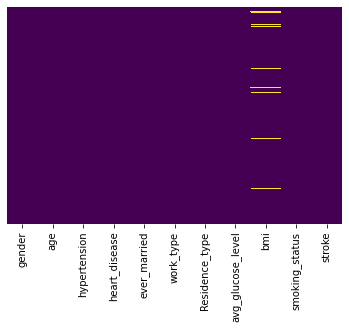

In [113]:
#heatmap da biblioteca seaborn para identificar elementos nulos ,bem como, o comando isnull que verifica linhas nulas
sns.heatmap(Stroke.isnull(),yticklabels=False,cbar=False,cmap="viridis")
Stroke.isnull().sum()

Observações:<br>
        -Na coluna BMI(indíce de massa corporéa) há 201 linhas nulas<br>
        -Para melhor análise será feita uma reposição desses valores considerando uma amostra aleatória desses valores

In [114]:
#Base de dados com categorizações em portugues para melhor visualização
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Saudável,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Teve Avc
1,Mulher,61.0,Saudável,Saudável,Sim,Trabalhador Autônomo,Rural,202.21,NaN,Nunca Fumou,Teve Avc
2,Homem,80.0,Saudável,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Teve Avc
3,Mulher,49.0,Saudável,Saudável,Sim,Privado,Urbano,171.23,34.4,Fumante,Teve Avc
4,Mulher,79.0,Hipertenso,Saudável,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Teve Avc


# Indentificação de possíveis Linhas fora de padrão(Outliers)

In [115]:
Stroke.gender.value_counts()

Mulher    2994
Homem     2115
Outro        1
Name: gender, dtype: int64

Observações:Para o gênero observamos um paciente com gênero não identificado como mulher ou homem,no entanto ,para 5110 pacientes apenas 1 paciente fora desses dois gêneros constitui algo fora do padrão por isso retirá-lo da amostra não impactará grandemente no resultado!

In [116]:
#Retirando esse paciente
Stroke[Stroke.gender=="Outro"]
Stroke.drop(index=3116,inplace=True)


In [117]:
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Saudável,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Teve Avc
1,Mulher,61.0,Saudável,Saudável,Sim,Trabalhador Autônomo,Rural,202.21,NaN,Nunca Fumou,Teve Avc
2,Homem,80.0,Saudável,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Teve Avc
3,Mulher,49.0,Saudável,Saudável,Sim,Privado,Urbano,171.23,34.4,Fumante,Teve Avc
4,Mulher,79.0,Hipertenso,Saudável,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Teve Avc


# Variáveis Quantitativas(Outliers)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

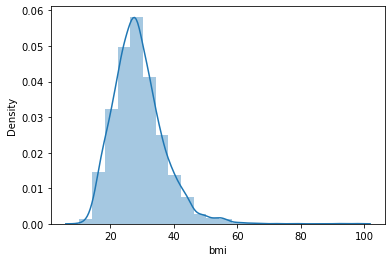

In [119]:
#BMI(Indice de massa corporal)
faixa=np.arange(min(Stroke.bmi),max(Stroke.bmi),4)
sns.distplot(a=Stroke.bmi,bins=faixa,hist=True,norm_hist=False)

Observações:<br>
    -Pela análise do grafico percebe-se que entre os pacientes análisados a grande maioria se concentra numa faixa de valores entre o mínimo valor da variavel BMI e o valor de 60 para o índice de massa corporea,ou seja ,pode-se remover valores acima de 60 sem prejuízo para análises posteriores.<br>
    -Além disso,a reposição de linhas nulas nessa coluna pode ser feita considerando uma amostra aleatória para o intervalo considerado visto no histograma sem ,no entanto ,haver maiores prejuizos para a análise exploratória dos dados.<br>
    Fonte:http://www.laboranalise.com.br/como-calcular-seu-indice-de-massa-corporal/<br>

In [133]:
#Retirando linhas da variável BMI:
remove=list(Stroke[Stroke.bmi>60].index)
Stroke.drop(index=remove,inplace=True)

In [136]:
#Reposição de linhas nulas
aleatório=np.random.randint(min(Stroke.bmi),60)
Stroke.bmi=Stroke.bmi.fillna(value=aleatório)

In [137]:
Stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Homem,67.0,Saudável,Cardiopata,Sim,Privado,Urbano,228.69,36.6,Ex-Fumante,Teve Avc
1,Mulher,61.0,Saudável,Saudável,Sim,Trabalhador Autônomo,Rural,202.21,22.0,Nunca Fumou,Teve Avc
2,Homem,80.0,Saudável,Cardiopata,Sim,Privado,Rural,105.92,32.5,Nunca Fumou,Teve Avc
3,Mulher,49.0,Saudável,Saudável,Sim,Privado,Urbano,171.23,34.4,Fumante,Teve Avc
4,Mulher,79.0,Hipertenso,Saudável,Sim,Trabalhador Autônomo,Rural,174.12,24.0,Nunca Fumou,Teve Avc
